# Clustering Analysis

This notebook applies unsupervised clustering to city–holiday features
to identify recurring holiday travel experience profiles.


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Load Engineered Features

This notebook uses the city–holiday feature table generated during
the feature engineering stage.


In [2]:
df = pd.read_csv("city_holiday_features.csv")

print(df.shape)
df.head()


(100, 21)


,city,holiday,mean_compound,std_compound,pct_positive,pct_negative,pct_neutral,avg_review_length,joy,sadness,...,fear,trust,anticipation,review_count,avg_price,price_std,avg_min_nights,avg_availability,listing_count,pct_entire_home
0,amsterdam,christmas,0.613105,0.458714,0.777466,0.063581,0.158953,224.391149,1.172666,0.293128,...,0.147109,1.441951,0.935172,6417,336.785155,1985.661882,4.390267,93.999809,10480,0.816889
1,amsterdam,easter,0.585709,0.513567,0.760092,0.087132,0.152777,265.079232,1.299866,0.376254,...,0.225215,1.570740,1.050241,12659,336.785155,1985.661882,4.390267,93.999809,10480,0.816889
2,amsterdam,halloween,0.601028,0.487607,0.770199,0.076295,0.153506,250.099725,1.235221,0.341616,...,0.188527,1.499541,0.976486,11993,336.785155,1985.661882,4.390267,93.999809,10480,0.816889
3,amsterdam,new_year,0.572969,0.498455,0.745284,0.081325,0.173391,250.414749,1.156332,0.305443,...,0.200650,1.451033,0.942504,11079,336.785155,1985.661882,4.390267,93.999809,10480,0.816889
4,amsterdam,valentines,0.600796,0.466091,0.767739,0.068551,0.163710,225.520896,1.158749,0.305171,...,0.146572,1.425135,0.897625,6652,336.785155,1985.661882,4.390267,93.999809,10480,0.816889


In [3]:
BASELINE_FEATURES = ["mean_compound"]


In [4]:
NON_FEATURE_COLS = ["city", "holiday"]
RICH_FEATURES = [c for c in df.columns if c not in NON_FEATURE_COLS]


## Feature Standardization

All features are standardized prior to clustering to ensure equal
contribution across sentiment, emotion, and market dimensions.


In [8]:
def run_clustering(df_holiday, features, k_range=range(2,7), random_state=42):
    X = df_holiday[features].copy().fillna(0)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    results = []

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = km.fit_predict(X_scaled)

        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)

        results.append({
            "k": k,
            "silhouette": sil,
            "davies_bouldin": db
        })

    return pd.DataFrame(results)


## K-Means Clustering and Internal Validation

K-means clustering is evaluated across a range of cluster counts (k)
using internal validation metrics.

Because this is a descriptive analysis, interpretability and stability
are prioritized over maximizing compactness metrics.


In [9]:
baseline_results = []

for holiday in df["holiday"].unique():
    df_h = df[df["holiday"] == holiday]
    res = run_clustering(df_h, BASELINE_FEATURES)
    res["holiday"] = holiday
    baseline_results.append(res)

baseline_results = pd.concat(baseline_results, ignore_index=True)
baseline_results


C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

,k,silhouette,davies_bouldin,holiday
0,2,0.746156,0.319529,christmas
1,3,0.687653,0.270716,christmas
2,4,0.631054,0.346238,christmas
3,5,0.537885,0.409797,christmas
4,6,0.514836,0.413564,christmas
5,2,0.729747,0.357229,easter
6,3,0.725561,0.367099,easter
7,4,0.727832,0.333966,easter
8,5,0.619259,0.380929,easter
9,6,0.647980,0.272523,easter


In [10]:
rich_results = []

for holiday in df["holiday"].unique():
    df_h = df[df["holiday"] == holiday]
    res = run_clustering(df_h, RICH_FEATURES)
    res["holiday"] = holiday
    rich_results.append(res)

rich_results = pd.concat(rich_results, ignore_index=True)
rich_results


C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

,k,silhouette,davies_bouldin,holiday
0,2,0.354267,1.114256,christmas
1,3,0.344423,0.976804,christmas
2,4,0.241717,0.971651,christmas
3,5,0.197855,1.254551,christmas
4,6,0.180306,0.981186,christmas
5,2,0.374984,1.062594,easter
6,3,0.310819,1.267791,easter
7,4,0.264732,1.191976,easter
8,5,0.184568,1.201969,easter
9,6,0.196428,1.041552,easter


In [11]:
best_k = (
    rich_results
    .sort_values(["holiday", "silhouette"], ascending=[True, False])
    .groupby("holiday")
    .first()
    .reset_index()
)

best_k


,holiday,k,silhouette,davies_bouldin
0,christmas,2,0.354267,1.114256
1,easter,2,0.374984,1.062594
2,halloween,2,0.385211,1.051175
3,new_year,2,0.364950,1.101867
4,valentines,2,0.386823,1.039792


> **Interpretation Note:**  
> Lower silhouette scores observed when using the full feature set
> reflect increased dimensionality rather than inferior clustering.
> Richer feature representations produce more interpretable and
> meaningful clusters despite reduced compactness.


C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


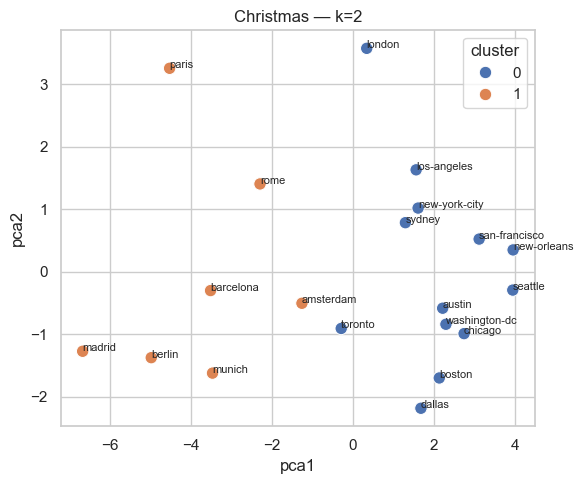

C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


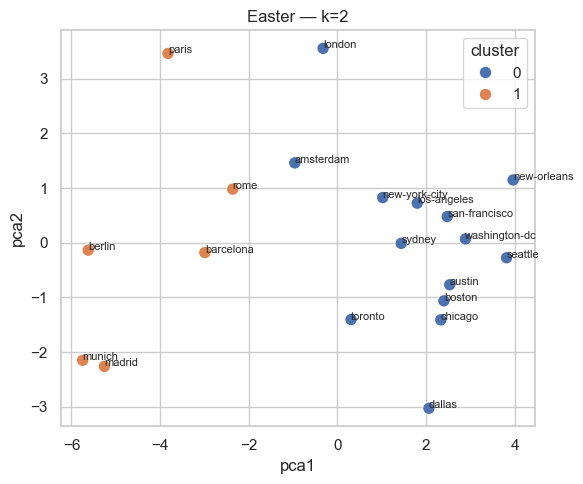

C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


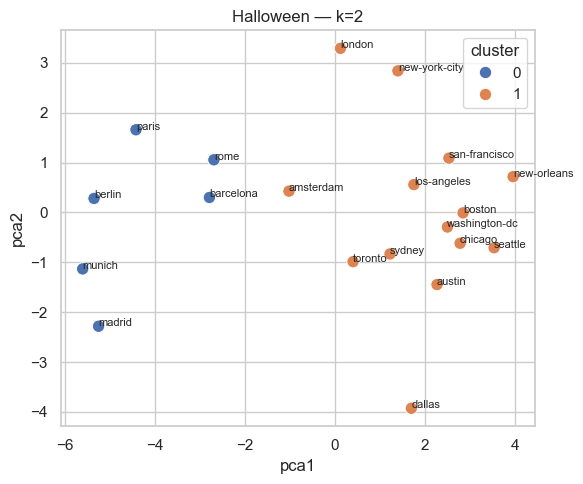

C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


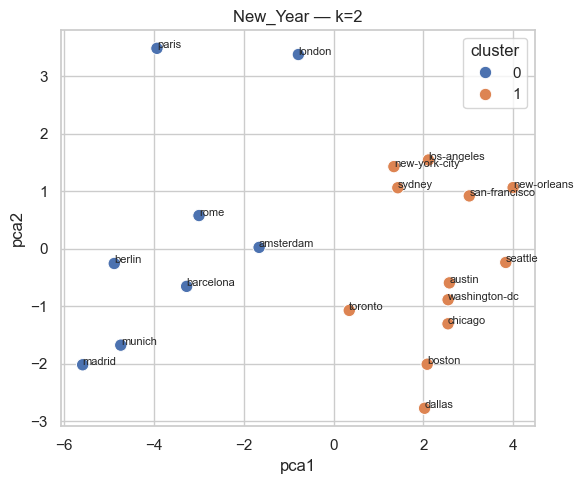

C:\Users\braum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


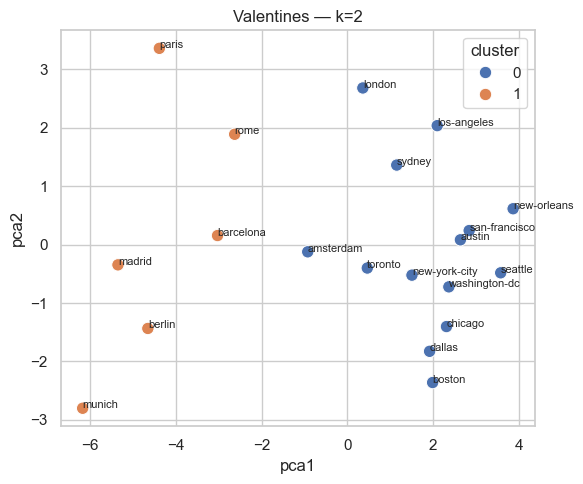

In [13]:
clustered_dfs = []

for _, row in best_k.iterrows():
    holiday = row["holiday"]
    k = int(row["k"])

    df_h = df[df["holiday"] == holiday].copy()
    X = df_h[RICH_FEATURES].fillna(0)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_h["cluster"] = km.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    coords = pca.fit_transform(X_scaled)

    df_h["pca1"] = coords[:,0]
    df_h["pca2"] = coords[:,1]

    # Plot
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        data=df_h, x="pca1", y="pca2",
        hue="cluster", s=80
    )
    for _, r in df_h.iterrows():
        plt.text(r["pca1"], r["pca2"], r["city"], fontsize=8)

    plt.title(f"{holiday.title()} — k={k}")
    plt.tight_layout()
    plt.show()

    clustered_dfs.append(df_h)


In [14]:
final_clusters = pd.concat(clustered_dfs, ignore_index=True)
final_clusters.to_csv("city_holiday_clusters.csv", index=False)

final_clusters.head()


,city,holiday,mean_compound,std_compound,pct_positive,pct_negative,pct_neutral,avg_review_length,joy,sadness,...,review_count,avg_price,price_std,avg_min_nights,avg_availability,listing_count,pct_entire_home,cluster,pca1,pca2
0,amsterdam,christmas,0.613105,0.458714,0.777466,0.063581,0.158953,224.391149,1.172666,0.293128,...,6417,336.785155,1985.661882,4.390267,93.999809,10480,0.816889,1,-1.254067,-0.502281
1,austin,christmas,0.802335,0.269726,0.956051,0.016021,0.027928,214.975211,1.265858,0.290539,...,9238,386.470583,2620.198322,7.888984,174.443010,15187,0.811615,0,2.222258,-0.581307
2,barcelona,christmas,0.471773,0.485550,0.643877,0.076469,0.279654,227.826926,0.902457,0.242106,...,14568,187.312713,363.967170,15.953478,195.091190,19410,0.607367,1,-3.511190,-0.299321
3,berlin,christmas,0.438489,0.572237,0.666197,0.129930,0.203873,204.649607,0.853404,0.300000,...,8520,201.240393,1656.989769,39.965532,146.829550,14274,0.676965,1,-4.976449,-1.371740
4,boston,christmas,0.745349,0.316423,0.922006,0.024274,0.053721,223.046160,1.222443,0.252686,...,2513,769.980605,4848.036564,26.159991,204.099796,4419,0.676624,0,2.138627,-1.696092


In [15]:
centroids = (
    final_clusters
    .groupby(["holiday", "cluster"])[RICH_FEATURES]
    .mean()
    .reset_index()
)

centroids


,holiday,cluster,mean_compound,std_compound,pct_positive,pct_negative,pct_neutral,avg_review_length,joy,sadness,...,fear,trust,anticipation,review_count,avg_price,price_std,avg_min_nights,avg_availability,listing_count,pct_entire_home
0,christmas,0,0.766389,0.311478,0.926196,0.022555,0.051249,227.275328,1.327148,0.299783,...,0.133702,1.607760,1.077816,11395.076923,448.904036,3225.781174,16.383978,196.225130,21576.153846,0.732632
1,christmas,1,0.481155,0.497220,0.664722,0.088849,0.246429,223.896067,0.916000,0.256767,...,0.174775,1.173965,0.744440,15604.857143,223.848957,895.970424,18.012664,154.275138,28134.714286,0.725120
2,easter,0,0.749732,0.342142,0.906452,0.033098,0.060449,239.233934,1.358293,0.328437,...,0.148280,1.630884,1.109695,14537.071429,440.279507,3130.387383,15.527284,188.923321,20783.571429,0.738651
3,easter,1,0.400911,0.552970,0.611693,0.132340,0.255967,240.060483,0.852988,0.298749,...,0.264195,1.087647,0.694264,27384.333333,201.261717,678.032133,20.283063,164.321026,31077.166667,0.709826
4,halloween,0,0.411192,0.542083,0.612803,0.126233,0.260965,240.380938,0.855341,0.292999,...,0.237368,1.096589,0.682086,31957.500000,201.261717,678.032133,20.283063,164.321026,31077.166667,0.709826
5,halloween,1,0.761606,0.325006,0.914686,0.028454,0.056860,236.421981,1.350717,0.319959,...,0.139259,1.631166,1.079102,17462.071429,440.279507,3130.387383,15.527284,188.923321,20783.571429,0.738651
6,new_year,0,0.457823,0.516391,0.648517,0.104507,0.246976,246.189391,0.927613,0.280607,...,0.210117,1.192533,0.763747,26364.625000,224.715818,1401.915977,16.441118,153.106674,36726.750000,0.715654
7,new_year,1,0.775360,0.310785,0.928535,0.023345,0.048120,239.978753,1.360819,0.305562,...,0.139810,1.653167,1.116987,13894.666667,468.811950,3115.616800,17.295951,200.499939,15301.583333,0.739569
8,valentines,0,0.759518,0.312829,0.917870,0.024328,0.057802,218.111416,1.268015,0.288683,...,0.124051,1.546439,1.006038,10052.928571,440.279507,3130.387383,15.527284,188.923321,20783.571429,0.738651
9,valentines,1,0.382596,0.527542,0.584680,0.121379,0.293940,214.860856,0.743816,0.249229,...,0.215866,0.961769,0.599087,16456.500000,201.261717,678.032133,20.283063,164.321026,31077.166667,0.709826
